In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
# Load data
df = pd.read_csv('../Dataset/DP3 Historical Data.csv', parse_dates=['Date'])
df1 = df1=df.reset_index()['Price']
df1

0       61,600
1       61,500
2       61,000
3       61,000
4       60,900
         ...  
1132    76,300
1133    74,700
1134    74,400
1135    74,900
1136    73,800
Name: Price, Length: 1137, dtype: object

In [4]:
df1 = df1.str.replace(',', '').astype(float)

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [10]:
# 8. Define GRU Model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 84010.77182737555
Testing RMSE: 66891.84812707621


In [ ]:
x_input = val_data[-60:].reshape((1, -1))
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:

    if len(temp_input) >= 100:  # Ensure at least 100 time steps for input
        x_input = np.array(temp_input[-100:])  # Take the last 100 elements
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1, 1)  # Reshape to match model input shape
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input)  # Use all available data if less than 100 time steps
        x_input = x_input.reshape(1, -1, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

[0.28942686]
61
[0.2914343]
62
[0.29487288]
63
[0.298991]
64
[0.30346566]
65
[0.30814055]
66
[0.3129333]
67
[0.3177971]
68
[0.3227033]
69
[0.32763284]
70
[0.33257216]
71
[0.33751133]
72
[0.34244287]
73
[0.34736052]
74
[0.35225922]
75
[0.3571347]
76
[0.36198306]
77
[0.36680114]
78
[0.3715859]
79
[0.37633452]
80
[0.38104466]
81
[0.38571373]
82
[0.39033976]
83
[0.39492065]
84
[0.3994543]
85
[0.40393895]
86
[0.4083729]
87
[0.41275445]
88
[0.41708213]
89
[0.42135432]
90


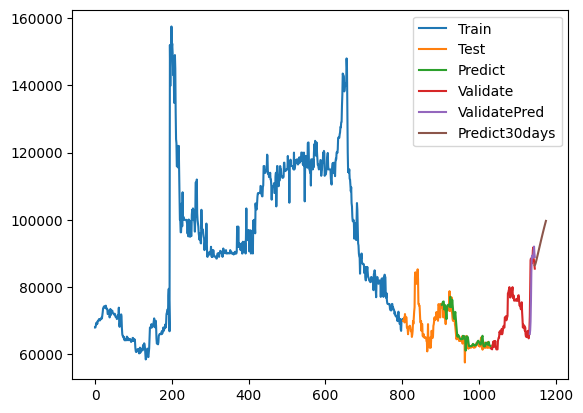

In [ ]:
# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])    
plt.show()

Epoch 1/100


c:\Users\khaqt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - loss: 0.1377
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0194
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0115
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0070
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0029
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0014
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0014
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0012
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 8.3003e-04
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0021
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0019
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0019
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0010    
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0010  
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss

ValueError: x and y must have same first dimension, but have shapes (227,) and (126,)

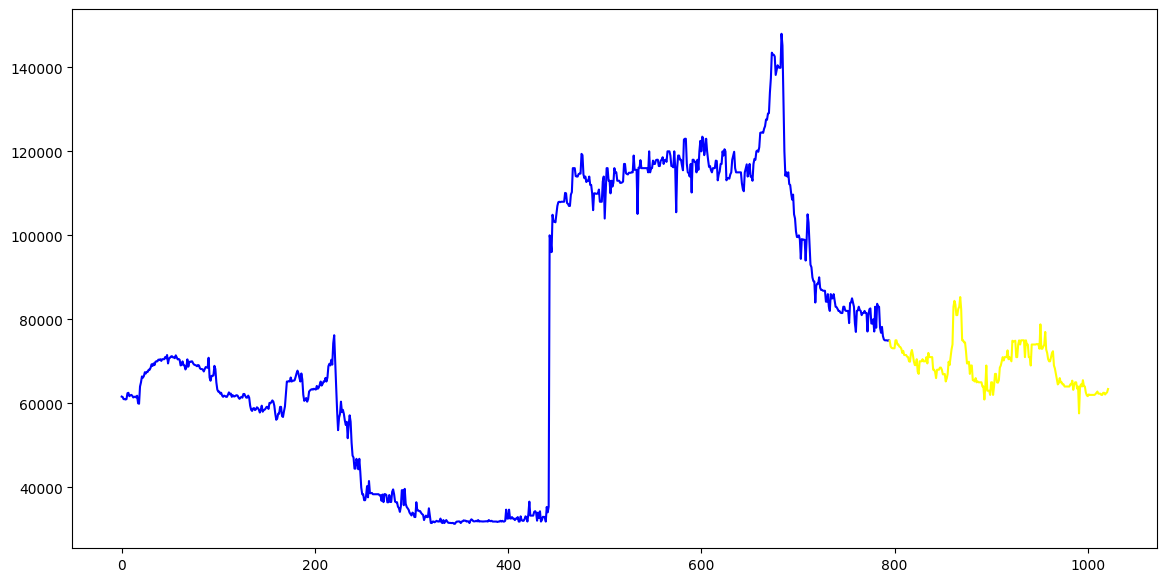

In [25]:
def gru_stock_forecast(df, train_split=0.7, test_split=0.2):
    # Clean and preprocess data
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    
    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(np.array(df['Price']).reshape(-1, 1))
    
    # Split data
    train_size = int(train_split * len(scaled_data))
    test_size = int(test_split * len(scaled_data))
    val_size = len(scaled_data) - train_size - test_size

    train_data = scaled_data[:train_size]
    test_data = scaled_data[train_size:train_size + test_size]

    # Create sequences for GRU
    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_step - 1):
            a = dataset[i:(i + time_step), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)
    
    time_step = 100
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    # Reshape input to be [samples, time steps, features] which is required for GRU
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Define GRU model
    model = Sequential()
    model.add(GRU(64, input_shape=(time_step, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Fit model
    model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Forecast next 30 days
    forecast = []
    temp_input = list(test_data[-time_step:].reshape(1, -1)[0])
    
    for i in range(30):
        if len(temp_input) >= time_step:
            x_input = np.array(temp_input[-time_step:]).reshape(1, -1, 1)
            y_hat = model.predict(x_input, verbose=0)[0][0]
            forecast.append(y_hat)
            temp_input.append(y_hat)
        else:
            break
    
    # Inverse transform to get original scale
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

    # Plotting
    plt.figure(figsize=(14, 7))
    
    # Plot training data
    plt.plot(np.arange(train_size), scaler.inverse_transform(train_data), label='Train Data', color='blue')
    
    # Plot test data
    plt.plot(np.arange(train_size, train_size + test_size), scaler.inverse_transform(test_data), label='Test Data', color='yellow')
    
    # Plot predictions on test set
    plt.plot(np.arange(train_size, train_size + test_size), y_pred, label='Predictions on Test', color='green')
    
    # Plot next 30 days forecast
    plt.plot(np.arange(train_size + test_size, train_size + test_size + 30), forecast, label='Next 30 Days Forecast', color='red')
    
    plt.title('GRU Stock Price Forecast')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Example usage with your dataset
df = pd.read_csv('../Dataset/DP3 Historical Data.csv', parse_dates=['Date'])
gru_stock_forecast(df)